In [1]:
import os

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
shapefile = os.path.join("..", "data", "boundaries", "uk_generalized_2015.shp")

In [3]:
map_df = gpd.read_file(shapefile).drop(["objectid"], axis=1).rename(columns={"pcon15nm":"constituency"})

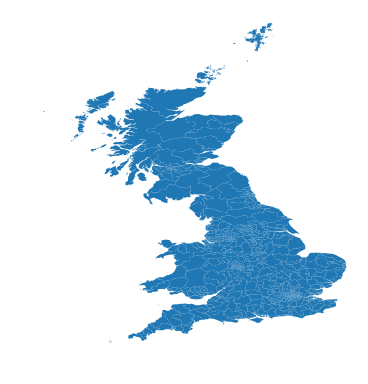

In [4]:
f, ax = plt.subplots(1, figsize=(6, 16))
ax = map_df.plot(ax=ax)
ax.set_axis_off()


In [5]:
datafile = os.path.join("..", "data", "information", "2019_3_28_8_14_constituency241584.csv")
data_df = pd.read_csv(datafile, encoding='latin-1').drop(["ons_code"], axis=1)
print(data_df.head())

                        name                    mp  signature_count
0             Edinburgh East     Tommy Sheppard MP            19035
1  Edinburgh North and Leith       Deidre Brock MP            27400
2            Edinburgh South         Ian Murray MP            20145
3       Edinburgh South West   Joanna Cherry QC MP            17409
4             Edinburgh West  Christine Jardine MP            14796


In [6]:
print(data_df.isna().sum())

name               0
mp                 1
signature_count    0
dtype: int64


In [7]:
data_df = data_df.fillna("No MP")

In [8]:
print(map_df.head())

    pcon15cd              constituency    st_areasha     st_lengths  \
0  E14000530                 Aldershot  5.297815e+07   42197.629271   
1  E14000531       Aldridge-Brownhills  4.401654e+07   38590.183714   
2  E14000532  Altrincham and Sale West  5.092937e+07   47813.461413   
3  E14000533              Amber Valley  1.246464e+08   64665.130033   
4  E14000534   Arundel and South Downs  6.452509e+08  333618.028722   

                                            geometry  
0  POLYGON ((-0.7754662421455992 51.3319588757355...  
1  POLYGON ((-1.905083771468352 52.64320757091168...  
2  POLYGON ((-2.315991936682887 53.43467382108594...  
3  POLYGON ((-1.33163551111198 53.08098788875827,...  
4  (POLYGON ((-0.5626196767013031 51.055736723659...  


In [9]:
combined_data = map_df.set_index("constituency").join(data_df.set_index("name")).reset_index()
combined_data.isna().sum()

constituency       0
pcon15cd           0
st_areasha         0
st_lengths         0
geometry           0
mp                 2
signature_count    2
dtype: int64

In [10]:
combined_data = combined_data.dropna()

(-9.17064267858978, 2.2835883679069395, 49.314873713636636, 61.41059276238902)

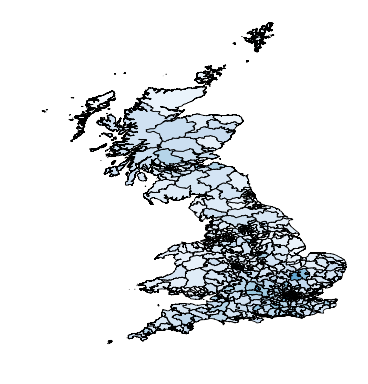

In [11]:
f, ax = plt.subplots(1, figsize=(6, 16))
ax = combined_data.plot(column="signature_count", cmap="Blues", linewidth=0.8, ax=ax, edgecolor="black")
ax.axis("off")